In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create sample heart disease dataset
X, y = make_classification(n_samples=300, n_features=4, n_classes=2, 
                          n_redundant=0, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Class distribution in test: {np.bincount(y_test)}")


Training set: (210, 4), Test set: (90, 4)
Class distribution in test: [42 48]


In [2]:
# Train different models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Get predictions
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Create confusion matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Random Forest Confusion Matrix:")
print(rf_cm)
print(f"TP: {rf_cm[1,1]}, TN: {rf_cm[0,0]}, FP: {rf_cm[0,1]}, FN: {rf_cm[1,0]}")

print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)
print(f"TP: {lr_cm[1,1]}, TN: {lr_cm[0,0]}, FP: {lr_cm[0,1]}, FN: {lr_cm[1,0]}")


Random Forest Confusion Matrix:
[[41  1]
 [ 3 45]]
TP: 45, TN: 41, FP: 1, FN: 3

Logistic Regression Confusion Matrix:
[[40  2]
 [ 3 45]]
TP: 45, TN: 40, FP: 2, FN: 3


In [3]:
# Calculate sensitivity and specificity manually
def calc_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Random Forest metrics
rf_sens, rf_spec = calc_metrics(rf_cm)
print(f"Random Forest:")
print(f"  Sensitivity: {rf_sens:.3f} ({rf_sens:.1%} of positives correctly identified)")
print(f"  Specificity: {rf_spec:.3f} ({rf_spec:.1%} of negatives correctly identified)")

# Logistic Regression metrics  
lr_sens, lr_spec = calc_metrics(lr_cm)
print(f"\nLogistic Regression:")
print(f"  Sensitivity: {lr_sens:.3f} ({lr_sens:.1%} of positives correctly identified)")
print(f"  Specificity: {lr_spec:.3f} ({lr_spec:.1%} of negatives correctly identified)")

print(f"\nComparison:")
print(f"Better sensitivity: {'Random Forest' if rf_sens > lr_sens else 'Logistic Regression'}")
print(f"Better specificity: {'Random Forest' if rf_spec > lr_spec else 'Logistic Regression'}")


Random Forest:
  Sensitivity: 0.938 (93.8% of positives correctly identified)
  Specificity: 0.976 (97.6% of negatives correctly identified)

Logistic Regression:
  Sensitivity: 0.938 (93.8% of positives correctly identified)
  Specificity: 0.952 (95.2% of negatives correctly identified)

Comparison:
Better sensitivity: Logistic Regression
Better specificity: Random Forest


In [4]:
# Create multi-class dataset (3 classes - like movie preferences)
X_multi, y_multi = make_classification(n_samples=400, n_features=4, n_classes=3, 
                                      n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# Train model and get predictions
rf_multi = RandomForestClassifier(random_state=42)
rf_multi.fit(X_train_m, y_train_m)
pred_multi = rf_multi.predict(X_test_m)

# Multi-class confusion matrix
cm_multi = confusion_matrix(y_test_m, pred_multi)
print("Multi-class Confusion Matrix (3x3):")
print(cm_multi)
print(f"Classes: {np.unique(y_multi)}")

# Calculate per-class sensitivity and specificity
class_names = ["Class 0", "Class 1", "Class 2"]
for i, class_name in enumerate(class_names):
    # For class i: TP = cm[i,i], FN = sum of row i except diagonal
    tp = cm_multi[i, i]
    fn = cm_multi[i, :].sum() - tp
    fp = cm_multi[:, i].sum() - tp  
    tn = cm_multi.sum() - tp - fn - fp
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\n{class_name}:")
    print(f"  Sensitivity: {sensitivity:.3f} ({sensitivity:.1%} of {class_name} correctly identified)")
    print(f"  Specificity: {specificity:.3f} ({specificity:.1%} of non-{class_name} correctly identified)")


Multi-class Confusion Matrix (3x3):
[[37  5  3]
 [ 6 36  0]
 [ 1  1 31]]
Classes: [0 1 2]

Class 0:
  Sensitivity: 0.822 (82.2% of Class 0 correctly identified)
  Specificity: 0.907 (90.7% of non-Class 0 correctly identified)

Class 1:
  Sensitivity: 0.857 (85.7% of Class 1 correctly identified)
  Specificity: 0.923 (92.3% of non-Class 1 correctly identified)

Class 2:
  Sensitivity: 0.939 (93.9% of Class 2 correctly identified)
  Specificity: 0.966 (96.6% of non-Class 2 correctly identified)


Binary Classification Report:
              precision    recall  f1-score   support

  No Disease       0.93      0.98      0.95        42
 Has Disease       0.98      0.94      0.96        48

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



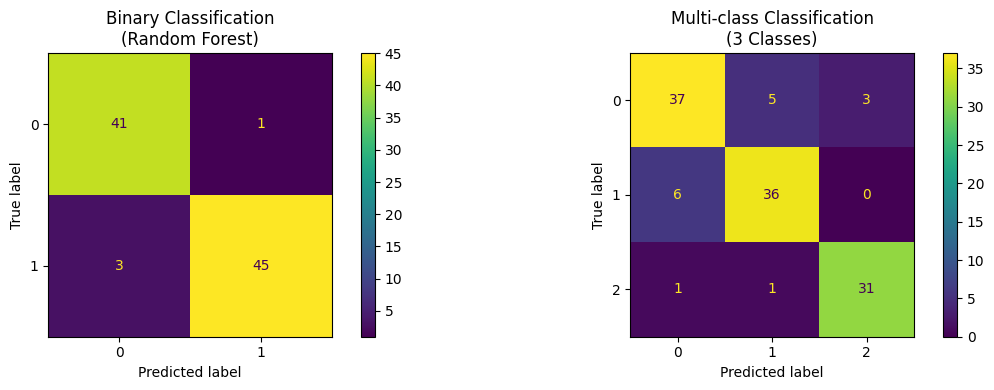


Multi-class Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.86      0.86      0.86        42
           2       0.91      0.94      0.93        33

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



In [5]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Binary classification report (includes sensitivity/specificity)
print("Binary Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['No Disease', 'Has Disease']))

# Visual confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax1)
ax1.set_title('Binary Classification\n(Random Forest)')

ConfusionMatrixDisplay.from_predictions(y_test_m, pred_multi, ax=ax2)
ax2.set_title('Multi-class Classification\n(3 Classes)')

plt.tight_layout()
plt.show()

# Multi-class classification report
print("\nMulti-class Classification Report:")
print(classification_report(y_test_m, pred_multi))
